#CMSC320 Final Project
###Dazhi Peng & Tianyu Huang
##1. Introduction
In modern days, people are always curious about how much their house is worthed and consulting the professional house dealer will usually take a lot of time. Therfore, we want to create a simple machinie learningn model using the linear regression model we learned this semester. In this tutorial, we explore the couple essential steps in the data analysis process, including data curation and preprocessing, exploratory data analysis, data normalization, and the comparison between different machine learning techiniques.
The dataset we use is from [Kaggle](https://www.kaggle.com/shree1992/housedata) and is only composed of the housing data in Washington State, USA.  

###Problem: Is it possible to use simple features and machine learning techniques to predict housing prices?

##2. Data collection
Since our data is pre-written in CSV format, first we need to import the [pandas](https://pandas.pydata.org/) package to use read_csv function. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('data.csv')
df.dropna()
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Here we first drop the rows with at least one feature is missing. As we can see, after dropping the N/A, the dataframe is consisted of 4600 rows and 18 columns. Most of them are numerical values but there are still some are categorical values. 

##3. Exploratory data analysis & data preprocessing

After travsering the whole coutnry column, we found out none of them is not from USA, therefore we drop this feature. Also for the date column, from tuition we believe it does not have a particularly strong relationship with price and also it can become hard to deal with. Thus we decide to also drop it. 

In [3]:
count = 0
for i in df['country']:
    if i!="USA":
        count += 1
count

0

In [4]:
df = df.drop(['country'],axis = 1)
df = df.drop(['date'],axis = 1)

For the categorical attributes, we found out there are 44 different cities, 77 different zipcodes, 115 different yr_built, and 4525 different street addresses. For the street feature, applying vectorization would result in a 4525 increase of column numbers. Therefore, we decide to just drop them since the addresses can also be showed from zipcode and cities. 

In [5]:
import numpy as np
len(np.unique(df['city']))

44

In [6]:
len(np.unique(df['statezip']))

77

In [7]:
len(np.unique(df['street']))

4525

In [8]:
len(np.unique(df['yr_renovated']))

60

In [9]:
df = df.drop(['street'],axis = 1)

For the other three caterical values including year built, year renovated, city, and tatezip, they are usually the most important factors for determining the housing price from common sense. However, unlike humans, the machines cannot understand the meaning of a year or a "street". Therefore, we choose to apply one-hot encoding to these three features. For clearity, we also change the price, floors, and bedrooms features to int type. 

In [10]:
citydum = pd.get_dummies(df['city'])
zipdum = pd.get_dummies(df['statezip'])
yrbdum = pd.get_dummies(df['yr_built'])
yrrdum = pd.get_dummies(df['yr_renovated'])
df1 = df.drop(['city', 'statezip', 'yr_built', 'yr_renovated'],axis = 1)
df = pd.concat([df1,citydum,zipdum, yrbdum, yrrdum], axis = 1)

df['price'] = (df['price']).astype(int)
df['floors'] = (df['floors']).astype(int)
df['bedrooms'] = (df['bedrooms']).astype(int)

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,313000,3,1.50,1340,7912,1,0,0,3,1340,...,1,0,0,0,0,0,0,0,0,0
1,2384000,5,2.50,3650,9050,2,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000,3,2.00,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000,3,2.25,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000,4,2.50,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1.75,1510,6360,1,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,534333,3,2.50,1460,7573,2,0,0,3,1460,...,0,0,0,0,1,0,0,0,0,0
4597,416904,3,2.50,3010,7014,2,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,203400,4,2.00,2090,6630,1,0,0,3,1070,...,0,0,0,0,0,0,0,0,0,0


To get a general idea of the relationship between features (aside from those one-hot encoding ones) and the price, we perform a simple Pearson correlation coefficient analysis here. Here we can see most of the correlation is around 0.2, pretty weak in terms of correlation. However, suggesting that the probable important features will still be the geo location. 

In [11]:
from scipy.stats import pearsonr

i = 0
for col in df:
    if i< 13:
        corr, _ = pearsonr(df["price"], df[col])
        print('Pearsons correlation between price and ' + col + ' is: %.3f' % corr)
        i=i+1
    else:
        break

Pearsons correlation between price and price is: 1.000
Pearsons correlation between price and bedrooms is: 0.200
Pearsons correlation between price and bathrooms is: 0.327
Pearsons correlation between price and sqft_living is: 0.430
Pearsons correlation between price and sqft_lot is: 0.050
Pearsons correlation between price and floors is: 0.137
Pearsons correlation between price and waterfront is: 0.136
Pearsons correlation between price and view is: 0.229
Pearsons correlation between price and condition is: 0.035
Pearsons correlation between price and sqft_above is: 0.368
Pearsons correlation between price and sqft_basement is: 0.210
Pearsons correlation between price and Algona is: -0.020
Pearsons correlation between price and Auburn is: -0.089


First we would like to have a idea how our target (price) is distributed in this dataset. Here we choose to use the box plot from the seaborn library. 

In [12]:
import seaborn as sns

sns.set(style="whitegrid")

ax = sns.boxplot(x=df.price)

Here we can see most of the data is within the 0-0.5 1e7 area but there are still a couple outliers which are significatnly higher (BTW, Washington is where Bill Gates lives lol). However, here we are still not sure whether such outliers would affect the performance of linear regression, therefore, we decide to draw graphs between all different features vs. price. 

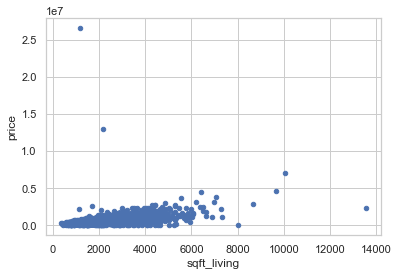

In [13]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

df.plot.scatter(x = 'sqft_living', y = 'price')

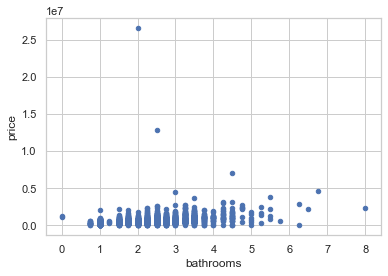

In [14]:
df.plot.scatter(x = 'bathrooms', y = 'price')

After the first two graphs, we can see that the outliers had siginificant affect the linearity assumption of our model. Would apply normalization help? Therefore, we first try apply normalization first.  

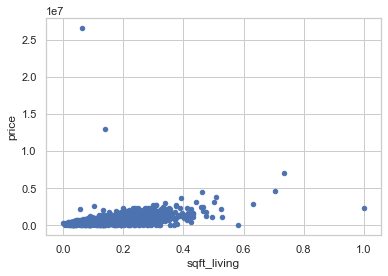

In [15]:
df_normalized = df.copy()

for feature_name in df:
    if feature_name != "price":
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        df_normalized[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
df_normalized.plot.scatter(x = 'sqft_living', y = 'price')

Unfortunately, as we can see, the normalization didn't help no matter we set feature_name equal to "price" or not. Therefore, since we didn't talk about non-linear model in CMSC320, the only option we had is to drop these outliers. The method we applied here is pretty straighforward, simply removing entries whose price is over 1e7. 

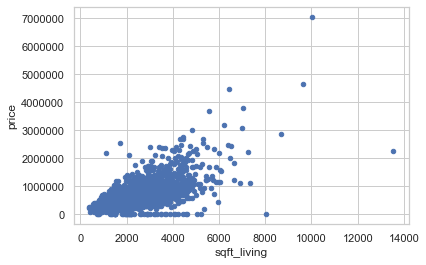

In [16]:
df = df[df.price < 10000000]
df.plot.scatter(x = 'sqft_living', y = 'price')

Redraw the graph, it seems like a linear model would now be good for this dataset, at least between price and sqft_living. Now we would like to explore the relationship between price and other features. 

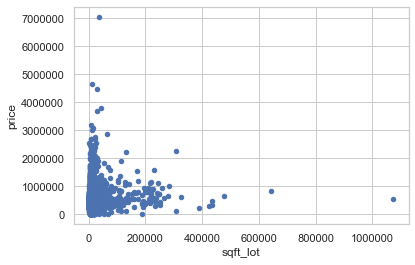

In [17]:
df.plot.scatter(x = 'sqft_lot', y = 'price')

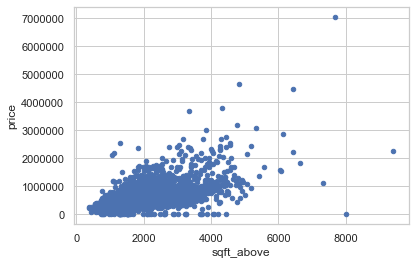

In [18]:
df.plot.scatter(x = 'sqft_above', y = 'price')

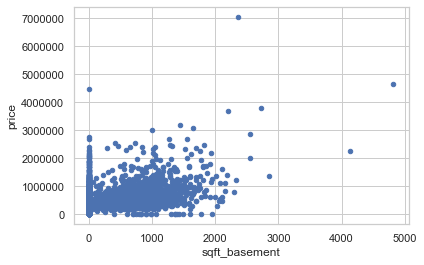

In [19]:
df.plot.scatter(x = 'sqft_basement', y = 'price')

##4. Machine learning
As we can see, most of the relation here is linear, linear regression seems promising here. Since normalization didn't affect the performance of linear regression, we will skip this part.
Here we first tried to use the Linear Regression model from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) but the mean squared error was pretty big.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

X = df.drop(['price'], axis=1)
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regression_model =  LinearRegression()
regression_model.fit(X_train, y_train)

mean_squared_error(y_test, regression_model.predict(X_test))

75680624390158.73

The reason might because the vectorization of categorical attributes made the model become a non-linear relationship. As a result, we decided to switch to the non-linear method usin KNN. The mean squared error significantly decreased but was still not good enough. 

In [22]:
from sklearn.neighbors import KNeighborsRegressor

regression_model =  KNeighborsRegressor(n_neighbors=3)
regression_model.fit(X_train, y_train)

mean_squared_error(y_test, regression_model.predict(X_test))

111171221146.01305

And the accuracy calculated by R2 score is shown below.

In [23]:
regression_model.score(X_test, y_test)

0.31825639082009416

The situation now become interesting. After group discussionn, we believe that the reason for such big error was because the one-hot encoding of the years, zipcodes, and cities may not be appropriate since their weight become too large. As a result, we choose to try a naive version of input by simply dropping out the categorical attributes. 

In [29]:
ndf = pd.read_csv ('data.csv')
ndf = ndf.drop(['statezip', 'country','date','street','yr_renovated','city','waterfront'],axis = 1)

X = ndf.drop(['price'], axis=1)
y = ndf[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
regression_model =  LinearRegression()
regression_model.fit(X_train, y_train)

mean_squared_error(y_test, regression_model.predict(X_test))

59846416411.533005

The new accuracy we got is:

In [30]:
regression_model.score(X_test, y_test)

0.5092640981041298

As you can see, the error decreased around 30% and our guess was proved right.

##5. Conclusion
The housing price prediction task was more complex than we previous thought. The diffculties mostly concentrate on the processing of categorical attributes and our attempt of one-hot encoding doesn't prove to work very well. Therefore, we believe the vectorization may only work well when the categorical attribute has a relateively small number of cases.

Thank you for your reading!